In [2]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

In [3]:
df = pd.read_csv(Path('Resources/monthly_consumption_arima.csv'))
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                       test='adf',       # use adftest to find optimal 'd'
                       max_p=5, max_q=5, # maximum p and q
                       m=12,              # frequency of series
                       d=None,           # let model determine 'd'
                       seasonal=True,   # No Seasonality
                       start_P=0, 
                       D=1, 
                       trace=True,
                       error_action='ignore',  
                       suppress_warnings=True, 
                       stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=2921.045, Time=0.20 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2923.592, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2920.731, Time=0.08 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=2920.364, Time=0.08 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2931.125, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=2918.730, Time=0.04 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=2920.415, Time=0.07 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=2921.081, Time=0.12 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2921.695, Time=0.05 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=2920.810, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2919.266, Time=0.03 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=2923.132, Time=0.11 sec
 ARIMA(0,0,1)(0,1,0)[12]             : AIC=2922.730, Time=0.02 sec

Best model:  ARIMA(0,0,1)(0,1,0)[12] intercept
Total fit time: 0.920 seconds
        

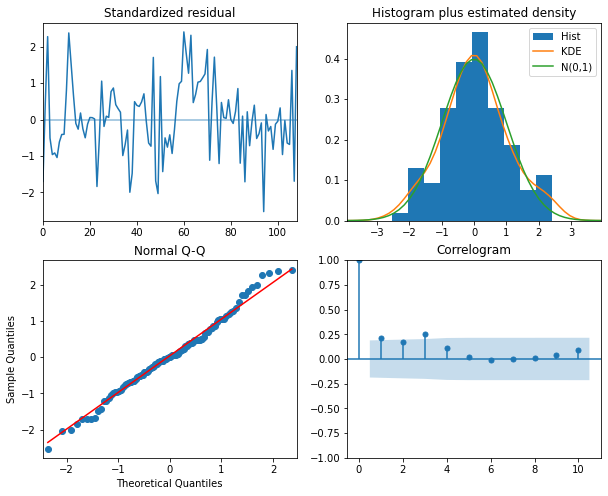

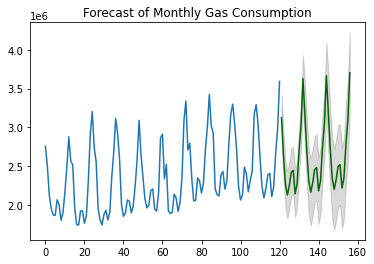

<Figure size 2160x2160 with 0 Axes>

In [13]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

# Forecast
n_periods = 36
fc, confint = model.predict(n_periods=n_periods,return_conf_int=True)



index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Forecast of Monthly Gas Consumption")
plt.figure(figsize=(30, 30))
plt.show()

In [59]:
df2 = pd.read_csv(Path('Resources/daily_hh_arima.csv'))
model2 = pm.auto_arima(df2.value, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=365,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model2.summary())

C:\Users\onur\anaconda3\envs\dev\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (365) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36601.566, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=33531.530, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=26650.953, Time=0.30 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=26714.697, Time=0.41 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=26447.100, Time=0.46 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=31624.902, Time=0.43 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=26383.418, Time=0.84 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=26371.275, Time=0.56 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=26386.603, Time=0.98 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=1.87 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=1.94 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=26378.663, Time=0.60 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=26379.794, Time=1.18 sec
 ARIMA(4,0,3)(0,0,0)[0]             :

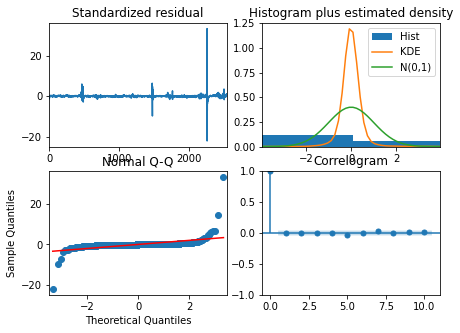

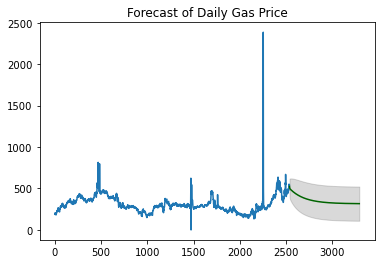

In [60]:
model2.plot_diagnostics(figsize=(10,8))
plt.show()

# Forecast
n_periods = 756
fc, confint = model2.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df2.value), len(df2.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df2.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Forecast of Daily Gas Price")
plt.show()